In [103]:
#Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import csv
import seaborn as sns
import numpy as np
import plotly



### Inspecting and Cleaning the data

In [3]:
data=pd.read_csv("C:/Yashi/UBC MDS/OWN/GIT UPLOAD/SuicideAnalysis/master.csv")
data.head(5)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [9]:
data.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [21]:
data=data.rename(columns = {' gdp_for_year ($) ':'gdp_for_year', 'gdp_per_capita ($)':'gdp_per_capita'})
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            27820 non-null  object 
 1   year               27820 non-null  int64  
 2   sex                27820 non-null  object 
 3   age                27820 non-null  object 
 4   suicides_no        27820 non-null  int64  
 5   population         27820 non-null  int64  
 6   suicides/100k pop  27820 non-null  float64
 7   country-year       27820 non-null  object 
 8   HDI for year       8364 non-null   float64
 9   gdp_for_year       27820 non-null  object 
 10  gdp_per_capita     27820 non-null  int64  
 11  generation         27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [22]:
data.shape


(27820, 12)

In [23]:
data.isnull().sum()

country                  0
year                     0
sex                      0
age                      0
suicides_no              0
population               0
suicides/100k pop        0
country-year             0
HDI for year         19456
gdp_for_year             0
gdp_per_capita           0
generation               0
dtype: int64

The dataset has 12 columns with 27820 records, there are NAs in column 'HDI for year'. The response variable is the suicides_no. The data is k-anonymised has there has been generalized especially the age.

In [24]:
#need to get rid of columns with too many NaN values
del data["HDI for year"]

In [26]:
data.describe(include="all")

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,gdp_for_year,gdp_per_capita,generation
count,27820,27820.000000,27820,27820,27820.000000,2.782000e+04,27820.000000,27820,27820,27820.000000,27820
unique,101,NaN,2,6,NaN,NaN,NaN,2321,2321,NaN,6
top,Mauritius,NaN,female,55-74 years,NaN,NaN,NaN,Albania1989,"2,450,084,970",NaN,Generation X
freq,382,NaN,13910,4642,NaN,NaN,NaN,12,12,NaN,6408
mean,NaN,2001.258375,NaN,NaN,242.574407,1.844794e+06,12.816097,NaN,NaN,16866.464414,NaN
std,NaN,8.469055,NaN,NaN,902.047917,3.911779e+06,18.961511,NaN,NaN,18887.576472,NaN
min,NaN,1985.000000,NaN,NaN,0.000000,2.780000e+02,0.000000,NaN,NaN,251.000000,NaN
25%,NaN,1995.000000,NaN,NaN,3.000000,9.749850e+04,0.920000,NaN,NaN,3447.000000,NaN
50%,NaN,2002.000000,NaN,NaN,25.000000,4.301500e+05,5.990000,NaN,NaN,9372.000000,NaN
75%,NaN,2008.000000,NaN,NaN,131.000000,1.486143e+06,16.620000,NaN,NaN,24874.000000,NaN


In [29]:
#Categorical variables
data.select_dtypes(include=[object]).columns

Index(['country', 'sex', 'age', 'country-year', 'gdp_for_year', 'generation'], dtype='object')

In [30]:
data['age'].unique()

array(['15-24 years', '35-54 years', '75+ years', '25-34 years',
       '55-74 years', '5-14 years'], dtype=object)

In [37]:
data['country'].nunique()
data['year'].nunique()

101

There are 6 age group in the dataset. The data is collected for 101 different countries and for 32 different years


### Exploratory Data Analysis

array([[<AxesSubplot:title={'center':'suicides_no'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'suicides/100k pop'}>,
        <AxesSubplot:>]], dtype=object)

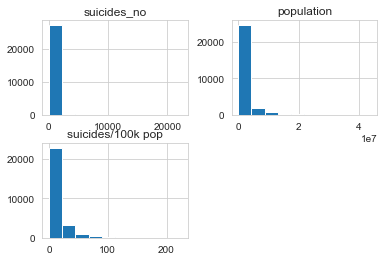

In [93]:
data.hist(column=['suicides_no','population','suicides/100k pop','gdp_for_year','gdp_per_capita'])


{'whiskers': [<matplotlib.lines.Line2D at 0x1eb90aac820>,
 'caps': [<matplotlib.lines.Line2D at 0x1eb90abc5b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1eb90a9b070>],
 'medians': [<matplotlib.lines.Line2D at 0x1eb90acc070>],
 'fliers': [<matplotlib.lines.Line2D at 0x1eb90adf820>],
 'means': []}

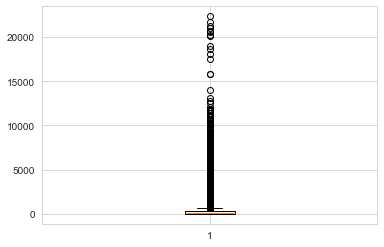

In [96]:
plt.boxplot(data['suicides_no'])

Clear presence of a lot of outliers for the data['suicides_no'] column. These do not provide a clear picture of the  interference performed from the data.

In [107]:
pip install seaborn

In [110]:
corr=data.corr()
corr.style.background_gradient(cmap='coolwarm')

,year,suicides_no,population,suicides/100k pop,gdp_per_capita,suicide_per_pop,AgeNum
year,1.000000,-0.005592,0.008850,-0.039037,0.339134,-0.038574,0.002524
suicides_no,-0.005592,1.000000,0.598344,0.275364,0.056531,0.001456,0.045463
population,0.008850,0.598344,1.000000,0.008285,0.081510,-0.083657,-0.088188
suicides/100k pop,-0.039037,0.275364,0.008285,1.000000,0.001785,-0.115123,0.354783
gdp_per_capita,0.339134,0.056531,0.081510,0.001785,1.000000,-0.044027,0.000676
suicide_per_pop,-0.038574,0.001456,-0.083657,-0.115123,-0.044027,1.000000,0.172674
AgeNum,0.002524,0.045463,-0.088188,0.354783,0.000676,0.172674,1.000000


It can be clearly seen that there is a positive correlation between population size and the suicides_no. The GDP per capita and the Suicide per 100K have a strong negative correlation. This means that when the suicide rate increases, the GDP per capita decreases. We can see that there most of the values are placed on the spot where GDP is high and the suicide rate is low or the opposite.

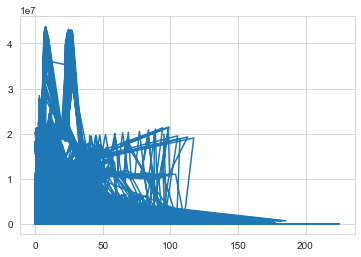

In [111]:
plt.plot('suicides/100k pop','population',data=data)
plt.show()

#### Outlier Removal

In [97]:
import scipy.stats
#Analysis into “outlier” and “normal”
def find_remove_outlier_iqr(data_sample):
    q1 = np.percentile(data_sample, 25)
    q3 = np.percentile(data_sample, 75)
    
    iqr = q3 - q1
    
    cutoff = iqr * 1.5
    
    lower, upper = q1-cutoff, q3+cutoff
    
    outliers =[]
    outliers_removed = []
    for x in data_sample:
        if x < lower or x > upper:
            outliers.append(x)
        if x > lower and x < upper:
            outliers_removed.append(x)
    return outliers

In [100]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

outliers = find_remove_outlier_iqr(data["suicides_no"])

out_df = data[data["suicides_no"].isin(outliers)]
#creating a dataframe without the outliers
no_out_df = data[~data["suicides_no"].isin(outliers)]
no_out_df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,gdp_for_year,gdp_per_capita,generation,suicide_per_pop,AgeNum,AgeCategory
0,Albania,1987,male,15-24 years,21.0,312900,6.71,Albania1987,"2,156,624,900",796,Generation X,0.000067,15,Adolescent
1,Albania,1987,male,35-54 years,16.0,308000,5.19,Albania1987,"2,156,624,900",796,Silent,0.000052,35,Middle_Aged_Adults
2,Albania,1987,female,15-24 years,14.0,289700,4.83,Albania1987,"2,156,624,900",796,Generation X,0.000048,15,Adolescent
3,Albania,1987,male,75+ years,1.0,21800,4.59,Albania1987,"2,156,624,900",796,G.I. Generation,0.000046,75,Senior_Citizen
4,Albania,1987,male,25-34 years,9.0,274300,3.28,Albania1987,"2,156,624,900",796,Boomers,0.000033,25,Adults


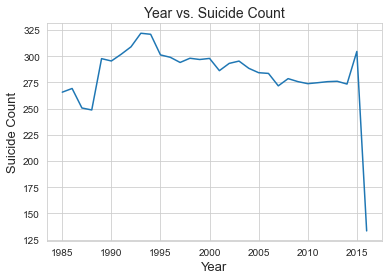

In [45]:
data['suicides_no'] = data['suicides_no'].replace(0,np.NAN)

mean_value=data['suicides_no'].mean()
data['suicides_no']=data['suicides_no'].fillna(mean_value)

data.groupby('year')['suicides_no'].mean().plot() 
plt.title("Year vs. Suicide Count",fontsize = 14) 
plt.xlabel('Year',fontsize = 13) 
plt.ylabel('Suicide Count',fontsize = 13)  
sns.set_style("whitegrid")

From observing our Time Series Line Plot, we can see a sharp drop in suicides in 1985. This decrease could be due to awareness of suicide & mental health in the 80s, as well as improved recognition of those at risk. A major fall can be observed for the mid of 2015 this could be because of change in living standard amongst the society with education and awareness about the spaces which help people in soothing their stress level.

In [46]:
from collections import Counter

def my_mode(sample):
    c = Counter(sample)
    return [k for k, v in c.items() if v == c.most_common(1)[0][1]]

In [47]:
my_mode(data['country'])

['Austria', 'Iceland', 'Mauritius', 'Netherlands']

#### Variables has the most and the least Suicides 
##### Which country?

In [48]:
m=max(data['suicides_no'])

In [50]:
min_index = data[suicides_no].idxmin()
#use the function 'idmax' to find the index of Highest suicide
high_index = data[suicides_no].idxmax()

high = pd.DataFrame(data.loc[high_index,:])
low = pd.DataFrame(data.loc[min_index,:])
    
print("Country Which Has Highest suicides_no"  + " : ",data['country'][high_index])
print("Country Which Has Lowest suicides_no" + "  : ",data['country'][min_index])


Country Which Has Highest suicides_no :  Russian Federation
Country Which Has Lowest suicides_no  :  Albania


,3,20996
country,Albania,Russian Federation
year,1987,1994
sex,male,male
age,75+ years,35-54 years
suicides_no,1.0,22338.0
population,21800,19044200
suicides/100k pop,4.59,117.3
country-year,Albania1987,Russian Federation1994
gdp_for_year,"2,156,624,900","395,077,301,248"
gdp_per_capita,796,2853


In [52]:
data.head(15)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21.000000,312900,6.71,Albania1987,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16.000000,308000,5.19,Albania1987,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14.000000,289700,4.83,Albania1987,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1.000000,21800,4.59,Albania1987,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9.000000,274300,3.28,Albania1987,"2,156,624,900",796,Boomers
5,Albania,1987,female,75+ years,1.000000,35600,2.81,Albania1987,"2,156,624,900",796,G.I. Generation
6,Albania,1987,female,35-54 years,6.000000,278800,2.15,Albania1987,"2,156,624,900",796,Silent
7,Albania,1987,female,25-34 years,4.000000,257200,1.56,Albania1987,"2,156,624,900",796,Boomers
8,Albania,1987,male,55-74 years,1.000000,137500,0.73,Albania1987,"2,156,624,900",796,G.I. Generation
9,Albania,1987,female,5-14 years,286.691023,311000,0.00,Albania1987,"2,156,624,900",796,Generation X


##### Which Year?

The graph below showed that some countries and states are missing data for certain years and certain ages. Therefore, there would be some errors due to the incompleted dataset.

In [54]:
data['suicides_no'] = data['suicides_no'].replace(0,np.NAN)
mean_value=data['suicides_no'].mean()
data['suicides_no']=data['suicides_no'].fillna(mean_value)
min_index = data['suicides_no'].idxmin()
    
high_index = data['suicides_no'].idxmax()

high = pd.DataFrame(data.loc[high_index,:])
low = pd.DataFrame(data.loc[min_index,:])

print("Year Which Has Highest suicides_no "+ " : ",data['year'][high_index])
print("Year Which Has Lowest suicides_no " + "  : ",data['year'][min_index])

Year Which Has Highest suicides_no  :  1994
Year Which Has Lowest suicides_no   :  1987


##### Which gender group by country?

In [65]:
sum_male = data[data['sex']=='male'].groupby ('country' )['suicides_no'].sum().reset_index() #watch the reset_index()
sum_female = data[data['sex']=='female'].groupby ('country' )['suicides_no'].sum().reset_index()
new_df = sum_male.merge(sum_female, on="country")
new_df

,country,suicides_no_x,suicides_no_y
0,Albania,8444.275585,10153.803772
1,Antigua and Barbuda,43873.726581,46158.254769
2,Argentina,63893.000000,18326.000000
3,Armenia,4850.292281,10242.494796
4,Aruba,12985.096053,20372.062662
...,...,...,...
96,United Arab Emirates,3677.601257,4111.674328
97,United Kingdom,104118.000000,33547.073070
98,United States,820216.000000,213797.000000
99,Uruguay,10891.382047,5113.528187


In [63]:
new_df['diff'] = new_df['suicides_no_x'] - new_df['suicides_no_y']
print(new_df[new_df['diff']==0])

                  country  suicides_no_x  suicides_no_y  diff
27               Dominica    1720.146140    1720.146140   0.0
76  Saint Kitts and Nevis    5160.438421    5160.438421   0.0


Only the country Dominica and Saint Kitts and Nevis have equal suicidal rate of 1720 between male and female. The highest suicidal rate is amongst the male group.

In [73]:
data['suicide_per_pop'] = data['suicides_no']/data['population']
min_index = data['suicide_per_pop'].idxmin()
    
high_index = data['suicide_per_pop'].idxmax()

high = pd.DataFrame(data.loc[high_index,:])
low = pd.DataFrame(data.loc[min_index,:])

print("Country with Highest suicide_per_pop "+ " : ",data['country'][high_index])
print("Country with Lowest suicide_per_pop " + "  : ",data['country'][min_index])

Country with Highest suicide_per_pop  :  Kiribati
Country with Lowest suicide_per_pop   :  Thailand


##### Age groups 

In [78]:
data['AgeNum'] = data['age'].str[:2]
data['AgeNum'].tail(7)

27813    75
27814    25
27815    35
27816    75
27817    5-
27818    5-
27819    55
Name: AgeNum, dtype: object

In [75]:
data['age'].head(5)

0    15-24 years
1    35-54 years
2    15-24 years
3      75+ years
4    25-34 years
Name: age, dtype: object

In [79]:
data['AgeNum'] = data['AgeNum'].map(lambda x: x.replace('-',''))

In [80]:
data['AgeNum'] = data['AgeNum'].astype(int)

data['AgeNum'].tail(3)

27817     5
27818     5
27819    55
Name: AgeNum, dtype: int32

In [81]:
# creates Age Categories
def AgeGroup(x):
    if(x >= 60):
        return "Senior_Citizen"
    elif(x >= 30):
        return "Middle_Aged_Adults"
    elif(x >= 18):
        return "Adults"
    else:
        return "Adolescent"



In [82]:
data['AgeCategory'] = data['AgeNum'].map(lambda x: AgeGroup(x))

In [83]:
data['AgeCategory'] = data['AgeCategory'].astype(str)
data['AgeCategory'].tail(3)

27817            Adolescent
27818            Adolescent
27819    Middle_Aged_Adults
Name: AgeCategory, dtype: object

Text(3.9250000000000043, 0.5, 'Suicide Count')

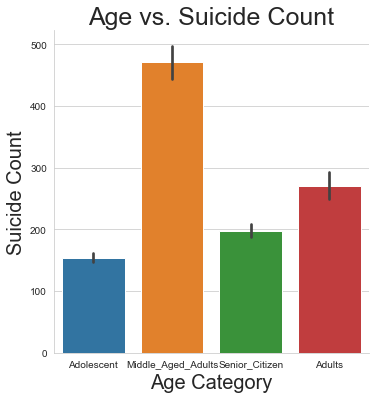

In [86]:
sns.catplot(x="AgeCategory", y="suicides_no", kind="bar",data=data);

plt.title('Age vs. Suicide Count',size=25)
plt.xlabel('Age Category',size=20)
plt.ylabel('Suicide Count',size=20)

The middle_aged category which is between 30  and 59 years of age has the highest Suicide rate. It is shocking to see that Senior citizens and adolescent have somewhat equal count as well which should not be the case.

In [87]:
data['sex'].value_counts()

female    13910
male      13910
Name: sex, dtype: int64

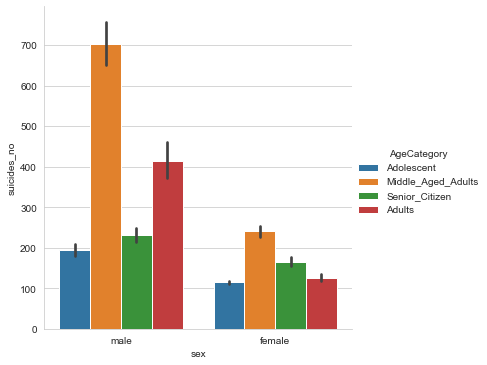

In [88]:
sns.catplot(x="sex", y="suicides_no", hue="AgeCategory", kind="bar", data=data);

In [ ]:
This is a surprising outcome, the males have high rate of suicides for all three ages.All the 4 age categories seem to level off at 100 for females but the males have increase in suicidal rate of above 200 for all the 4 age groups.